# Chapter 3 Single Scattering Properties

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 

## plot Rayleigh Scattering Properties

In [26]:
def Pmatrix_ray(theta,depol_factor=0.03):
    '''
    Phase matrix of Rayleigh scattering
    Reference: Hansen, J., and L. Travis (1974), Light scattering in planetary atmospheres, Space Science Reviews, 16(4), 527–610.
    
    Input:
        theta [degree]: scattering angle
        depol_factor : depolarization factor 
        
    Outputs:
        P11:
        P12:

    '''
    delta  = (1.0-depol_factor)/(1.0+depol_factor/2.0)
    deltap = (1.0-2.0*depol_factor)/(1.0-depol_factor)
    P11 =  3.0/4.0 * (1.0+np.cos(np.radians(theta))**2)
    P12 = -3.0*delta/4.0 * np.sin(np.radians(theta))**2
    return P11, P12

def HT_parameterization(wl,P):
    '''
    The parameterization scheme for the spectral variation of 
    the optical thickness due to Rayleigh scattering by standard atmosphere 
    
    Reference: Hansen, J., and L. Travis (1974), Light scattering in planetary atmospheres, Space Science Reviews, 16(4), 527–610.
    
    Input:
        wl [micron]: wavelength
        P [mb] : pressure level above which optical thickness is computed
        
    Outputs:
        tau: atmopsheric rayleigh scattering optical thickness above P

    '''
    P0 = 1013.25 
    wlpm4 = np.power(wl,-4)
    wlpm2 = np.power(wl,-2)
    tau0 =  0.008569*wlpm4*(1.0+0.0113*wlpm2 +0.00013* wlpm4 )
    
    return tau0*P/P0

def plot_Rayleigh():
    print(HT_parameterization(0.46,1000.0)) 
    Ang= np.arange(0,180.0,0.01)
    P11,P12 = Pmatrix_ray(Ang)
    print('max DoLP',np.nanmax(-P12/P11))
    
    fig, ax = plt.subplots(2,1,figsize=[6,8])
    ax[0].plot(Ang,P11, '-',  c='k', lw=2,label = r'$P_{11}$')
    ax[0].set_xlabel(r'Scattering Angle [$^\circ$]', fontsize='large')
    ax[0].set_ylabel(r'$P_{11}$', fontsize=16)
    ax[0].set_title('a) Phase Function of Rayleigh Scattering ')
    
    ax[1].plot(Ang,-P12/P11, '-',  c='k', lw=2,label = r'$P_{12}$')
    ax[1].set_xlabel(r'Scattering Angle [$^\circ$]', fontsize='large')
    ax[1].set_ylabel(r'$-P_{12}/P_{12}$', fontsize='large')
    ax[1].set_title('b) DoLP of Rayleigh Scattering' )
    
    
    plt.tight_layout()
    plt.savefig("Rayleigh_Scattering.png", dpi = 300)
    plt.show()
  
    wl = np.linspace(0.35,1.0,50)
    P  = np.linspace(200,1013,80)
    
    tau = np.zeros([P.size,wl.size])
    
    for i in range(P.size):
        for j in range(wl.size):    
            tau[i,j]=HT_parameterization(wl[j],P[i])

    
    X, Y = np.meshgrid(wl,P)
    
    fig,ax = plt.subplots()
    lvls = np.logspace(-3,0,10)
    img = ax.contourf(X,Y,tau,cmap=plt.cm.Greys_r,  norm = LogNorm(), levels= lvls)
    print(tau[:,0].size)
    ax.set_ylim([1013,200])
    ax.set_xlabel(r'Wavelength [$\mu m$]', fontsize = 'large')
    ax.set_ylabel('Pressure Above [mb]',    fontsize = 'large')
    plt.colorbar(img, ticks=lvls, format='%.4f',label='Rayleigh Optical Thickness')
    plt.savefig("Rayleigh_Optical_Thickness.png", dpi = 300)
    
    
    plt.figure()
    plt.plot(wl,tau[-1,:])
    plt.show()
    
    print('typical Rayleigh optical depth of atmosphere at sea level P~1000hPa')
    wvl = np.array([0.47,0.55,0.66,0.86,1.2,1.6])
    pres= np.array([1000,850,500])
    for wl in wvl:
        for p in pres:
            print('wavelength {0:4.2f} [µm] Rayleigh Optical Depth {1:5.1e}'.format(wl, HT_parameterization(wl,p)))
#     print('0.47 µm (blue light)',HT_parameterization(0.47,1000))
#     print('0.55 µm (green light)',HT_parameterization(0.55,1000))
#     print('0.66 µm (red light)',HT_parameterization(0.66,1000))     
#     print('0.86 µm (red light)',HT_parameterization(0.86,1000))     

0.1995133604636107
max DoLP 0.9556650246305419


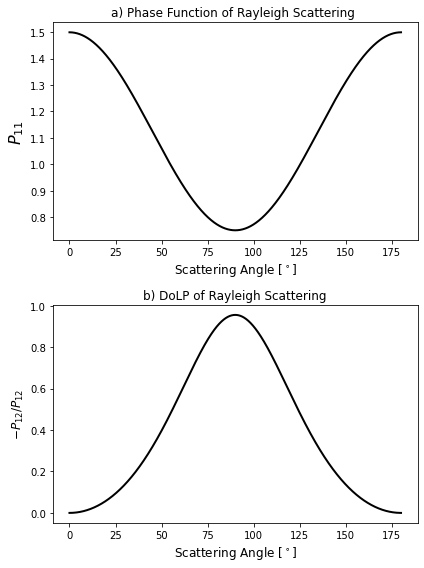

80


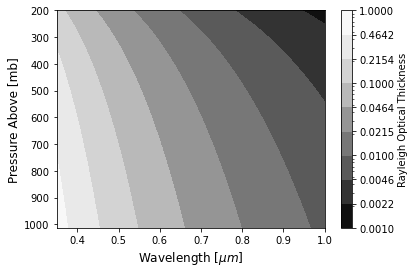

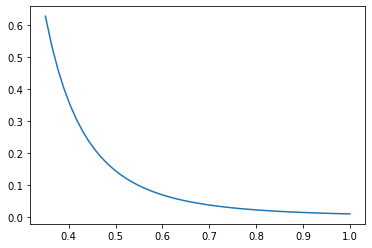

typical Rayleigh optical depth of atmosphere at sea level P~1000hPa
wavelength 0.47 [µm] Rayleigh Optical Depth 1.8e-01
wavelength 0.47 [µm] Rayleigh Optical Depth 1.6e-01
wavelength 0.47 [µm] Rayleigh Optical Depth 9.1e-02
wavelength 0.55 [µm] Rayleigh Optical Depth 9.6e-02
wavelength 0.55 [µm] Rayleigh Optical Depth 8.2e-02
wavelength 0.55 [µm] Rayleigh Optical Depth 4.8e-02
wavelength 0.66 [µm] Rayleigh Optical Depth 4.6e-02
wavelength 0.66 [µm] Rayleigh Optical Depth 3.9e-02
wavelength 0.66 [µm] Rayleigh Optical Depth 2.3e-02
wavelength 0.86 [µm] Rayleigh Optical Depth 1.6e-02
wavelength 0.86 [µm] Rayleigh Optical Depth 1.3e-02
wavelength 0.86 [µm] Rayleigh Optical Depth 7.9e-03
wavelength 1.20 [µm] Rayleigh Optical Depth 4.1e-03
wavelength 1.20 [µm] Rayleigh Optical Depth 3.5e-03
wavelength 1.20 [µm] Rayleigh Optical Depth 2.1e-03
wavelength 1.60 [µm] Rayleigh Optical Depth 1.3e-03
wavelength 1.60 [µm] Rayleigh Optical Depth 1.1e-03
wavelength 1.60 [µm] Rayleigh Optical Depth 6.5e

In [27]:
plot_Rayleigh()

## plot Mie Scattering Properties

reading <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    description: Output from Mie scattering computation
    dimensions(sizes): Diameter(10000), Wavelength(4), PhaseFunctionAngle(1801)
    variables(dimensions): float32 Diameter(Diameter), float32 Wavelength(Wavelength), float32 Refr_real(Wavelength), float32 Refr_img(Wavelength), float32 PhaseFunctionAngle(PhaseFunctionAngle), float32 SingleScatteringAlbedo(Diameter,Wavelength), float32 ExtinctionEfficiency(Diameter,Wavelength), float32 AsymmetryFactor(Diameter,Wavelength), float32 P11(Diameter,Wavelength,PhaseFunctionAngle), float32 P12(Diameter,Wavelength,PhaseFunctionAngle), float32 P33(Diameter,Wavelength,PhaseFunctionAngle), float32 P34(Diameter,Wavelength,PhaseFunctionAngle)
    groups: 
reading <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    description: Output from Mie scattering computation
    dimensions(sizes): Diame

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:165: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:166: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.


reading <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    description: Output from Mie scattering computation
    dimensions(sizes): Diameter(101), Wavelength(3), PhaseFunctionAngle(1801)
    variables(dimensions): float32 Diameter(Diameter), float32 Wavelength(Wavelength), float32 Refr_real(Wavelength), float32 Refr_img(Wavelength), float32 PhaseFunctionAngle(PhaseFunctionAngle), float32 SingleScatteringAlbedo(Diameter,Wavelength), float32 ExtinctionEfficiency(Diameter,Wavelength), float32 AsymmetryFactor(Diameter,Wavelength), float32 P11(Diameter,Wavelength,PhaseFunctionAngle), float32 P12(Diameter,Wavelength,PhaseFunctionAngle), float32 P33(Diameter,Wavelength,PhaseFunctionAngle), float32 P34(Diameter,Wavelength,PhaseFunctionAngle)
    groups: 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:187: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.


reading <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    description: Output from Mie scattering computation
    dimensions(sizes): Diameter(10), Wavelength(3), PhaseFunctionAngle(1801)
    variables(dimensions): >f4 Diameter(Diameter), >f4 Wavelength(Wavelength), >f4 Refr_real(Wavelength), >f4 Refr_img(Wavelength), >f4 PhaseFunctionAngle(PhaseFunctionAngle), >f4 SingleScatteringAlbedo(Diameter,Wavelength), >f4 ExtinctionEfficiency(Diameter,Wavelength), >f4 AsymmetryFactor(Diameter,Wavelength), >f4 P11(Diameter,Wavelength,PhaseFunctionAngle), >f4 P12(Diameter,Wavelength,PhaseFunctionAngle), >f4 P33(Diameter,Wavelength,PhaseFunctionAngle), >f4 P34(Diameter,Wavelength,PhaseFunctionAngle)
    groups: 


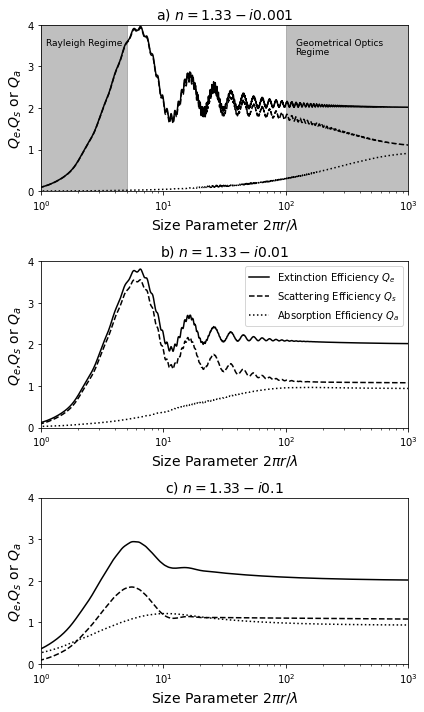

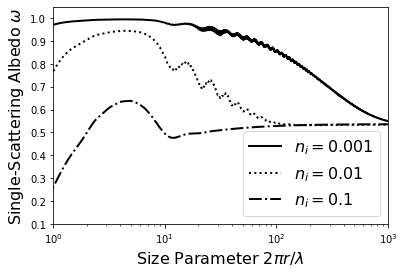

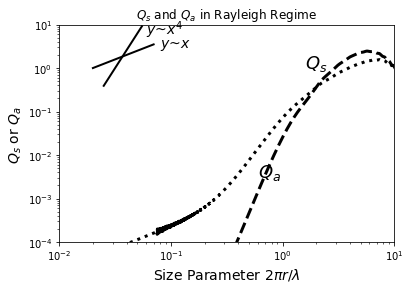

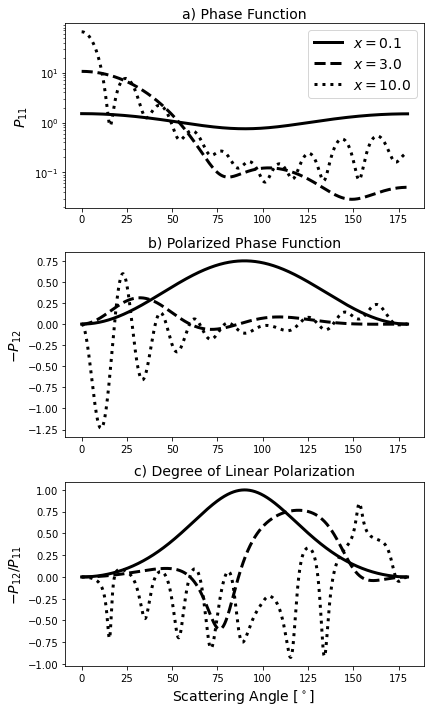

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
  fig.canvas.print_figure(bytes_io, **kw)


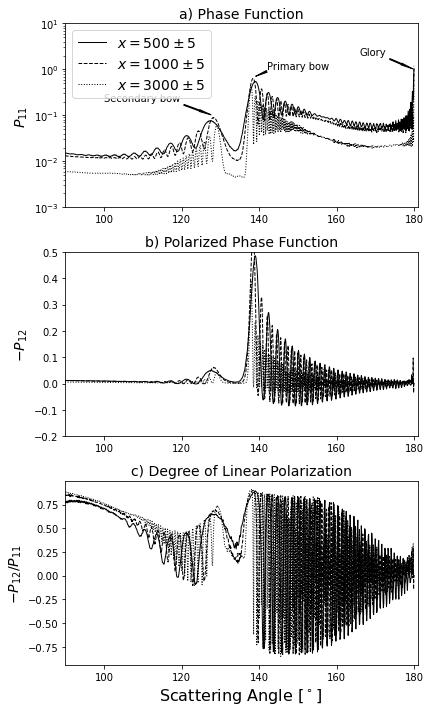

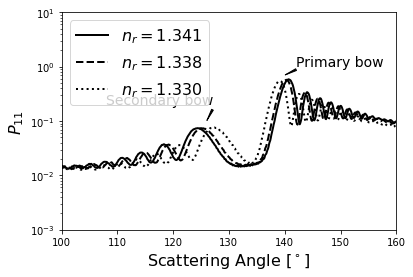

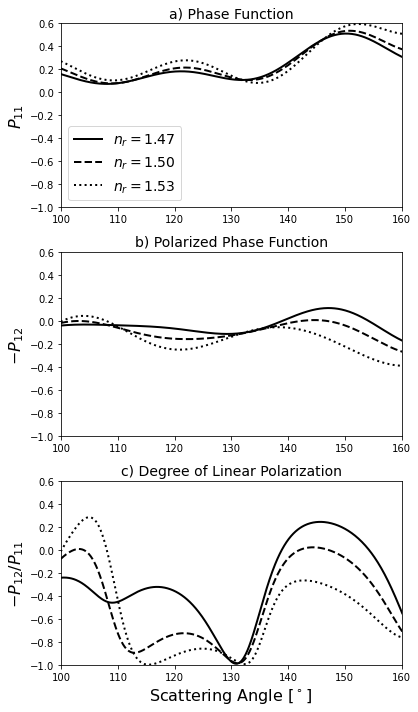

In [51]:
def read_mie_netcdf_data(netcdf_file):
    import netCDF4
    data_file  = netCDF4.Dataset(data_path+netcdf_file,'r')
    print('reading', data_file)
    D     = data_file.variables['Diameter'][:]
    Ang   = data_file.variables['PhaseFunctionAngle'][:]
    Qe    = data_file.variables['ExtinctionEfficiency'][:,:]
    Alb   = data_file.variables['SingleScatteringAlbedo'][:,:]
    P11   = data_file.variables['P11'][:,:,:]
    P12   = data_file.variables['P12'][:,:,:]
    P33   = data_file.variables['P33'][:,:,:]
    P34   = data_file.variables['P34'][:,:,:]
    return D, Ang, Qe, Alb, P11, P12, P33, P34
        
data_path  = './' 
figure_path  = data_path 
netcdf_file  = 'Nr1.33_ni0.0_sizeX0.01-3000.0.nc'

D, Ang, Qe, Alb, P11, P12, P33, P34 = read_mie_netcdf_data(data_path+netcdf_file)


#plt.figure('Efficiencies vs size')
#plt.semilogx(D,Qe[:,0],             'k-' , label=r'Extinction Efficiency $Q_e$')
#plt.semilogx(D,Qe[:,1]*Alb[:,1],    'k--', label=r'Scattering Efficiency $Q_s$')
#plt.semilogx(D,Qe[:,1]*(1-Alb[:,1]),'k:' , label=r'Absorption Efficiency $Q_a$')
#plt.xlim([1, 1000])
#plt.set_xscale('log')

#------------- figure 1--------------------------#
fig1, ax1 = plt.subplots(3,1,figsize=[6,10])
title = [r'a) $n=1.33-i0.001$',r'b) $n=1.33-i0.01$',r'c) $n=1.33-i0.1$']
for i in range(3):
    ax1[i].semilogx(D,Qe[:,i+1],             'k-' , label=r'Extinction Efficiency $Q_e$')
    ax1[i].semilogx(D,Qe[:,i+1]*Alb[:,i+1],    'k--', label=r'Scattering Efficiency $Q_s$')
    ax1[i].semilogx(D,Qe[:,i+1]*(1-Alb[:,i+1]),'k:' , label=r'Absorption Efficiency $Q_a$')
    ax1[i].set_xlim([1, 1000])
    ax1[i].set_ylim([0, 4])
    ax1[i].yaxis.set_ticks(np.arange(5))
    ax1[i].set_xlabel(r'Size Parameter $2\pi$$r$/$\lambda$', fontsize=14)
    ax1[i].set_ylabel(r'$Q_e$,$Q_s$ or $Q_a$ ', fontsize=14)
    ax1[i].set_title(title[i], fontsize=14)
    
ax1[1].legend(loc=0, fontsize=10);
ax1[0].axvspan(1, 5, alpha=0.5, color='gray')
ax1[0].text(1.1, 3.5, r'Rayleigh Regime', fontsize=9)
ax1[0].axvspan(100, 1000, alpha=0.5, color='gray')
ax1[0].text(120, 3.5, r'Geometrical Optics', fontsize=9)
ax1[0].text(120, 3.3, r'Regime', fontsize=9)
plt.tight_layout()
plt.savefig(figure_path+"Efficiency_vs_size.png", dpi = 300)

#------------- figure 1--------------------------#
fig11, ax11 = plt.subplots()
labels = [r'$n_i=0.0$',r'$n_i=0.001$',r'$n_i=0.01$',r'$n_i=0.1$']
#ax11.semilogx(D,Alb[:,0], 'k-' ,  label=labels[0],lw=2.0)
ax11.semilogx(D,Alb[:,1], 'k-' , label=labels[1],lw=2.0)
ax11.semilogx(D,Alb[:,2], 'k:' ,  label=labels[2],lw=2.0)
ax11.semilogx(D,Alb[:,3], 'k-.' , label=labels[3],lw=2.0)
ax11.set_xlim([1, 1000])
ax11.set_ylim([0.1, 1.05])
ax11.yaxis.set_ticks(np.arange(0.1,1.05,0.1))
ax11.set_xlabel(r'Size Parameter $2\pi$$r$/$\lambda$', fontsize=16)
ax11.set_ylabel(r'Single-Scattering Albedo $\omega$', fontsize=16)
ax11.legend(loc=0, fontsize=16);
plt.savefig(figure_path+"Albedo_vs_Size_Refractive.png", dpi = 300)

#------------- figure 2--------------------------#
fig2, ax2 = plt.subplots()
ax2.loglog(D,Qe[:,1]*Alb[:,3],             'k--' , label=r'Scattering Efficiency $Q_s$',linewidth=3)
ax2.loglog(D,Qe[:,1]*(1-Alb[:,3]),         'k:' , label=r'Absorption Efficiency $Q_a$',linewidth=3)
ds1 = np.arange(0.025,0.06,0.01)
ds2 = np.arange(0.02,0.08,0.01)
ax2.loglog(ds1,1e6*ds1**4,'k',linewidth=2)
ax2.loglog(ds2,50*ds2,'k',linewidth=2)
ax2.set_xlim([1e-2, 10])
ax2.set_ylim([1e-4, 10])
ax2.set_xlabel(r'Size Parameter $2\pi$$r$/$\lambda$', fontsize=14)
ax2.set_ylabel(r'$Q_s$ or $Q_a$ ',              fontsize=14)
ax2.text(0.06, 6.0, r'$y$~$x^4$', fontsize=14)
ax2.text(0.08, 3.0, r'$y$~$x$', fontsize=14)
ax2.text(1.6, 1, r'$Q_s$', fontsize=18)
ax2.text(0.6, 3e-3, r'$Q_a$', fontsize=18)
ax2.set_title(r'$Q_s$ and $Q_a$ in Rayleigh Regime') 
plt.savefig(figure_path+"Qs_Qa_Rayleigh.png", dpi = 300)

#------------- figure 3--------------------------#
fig3, ax3 = plt.subplots(3,1,figsize=[6,10])
title = [r'a) Phase Function','b) Polarized Phase Function','c) Degree of Linear Polarization']
x1 = 0.1
x1_index = np.where(D >= x1)[0][0]
x2 = 3.0
x2_index = np.where(D >= x2)[0][0]
x3 = 10
x3_index = np.where(D >= x3)[0][0]
wl_index = 1
fs = 14
ax3[0].semilogy(Ang,P11[x1_index ,wl_index, :], 'k-', label='$x=0.1$',linewidth=3 )
ax3[0].semilogy(Ang,P11[x2_index ,wl_index, :], 'k--',label='$x=3.0$',linewidth=3)
ax3[0].semilogy(Ang,P11[x3_index ,wl_index, :], 'k:', label='$x=10.0$',linewidth=3)
#ax3[0].set_xlabel(r'Scattering Angle $[ ^\circ]$ ', fontsize=fs)
ax3[0].set_ylabel(r'$P_{11}$ ',                     fontsize=fs)
ax3[0].set_title(title[0], fontsize=fs)
ax3[0].legend(loc=0, fontsize=fs);

ax3[1].plot(Ang,-P12[x1_index ,wl_index, :]*P11[x1_index ,wl_index, :],             'k-',linewidth=3)
ax3[1].plot(Ang,-P12[x2_index ,wl_index, :]*P11[x2_index ,wl_index, :],             'k--',linewidth=3)
ax3[1].plot(Ang,-P12[x3_index ,wl_index, :]*P11[x3_index ,wl_index, :],             'k:',linewidth=3)
#ax3[1].set_xlabel(r'Scattering Angle $[ ^\circ]$ ', fontsize=fs)
ax3[1].set_ylabel(r'$-P_{12}$ ',                    fontsize=fs)
ax3[1].set_title(title[1], fontsize=fs)

ax3[2].plot(Ang,-P12[x1_index ,wl_index, :],             'k-',linewidth=3)
ax3[2].plot(Ang,-P12[x2_index ,wl_index, :],             'k--',linewidth=3)
ax3[2].plot(Ang,-P12[x3_index ,wl_index, :],             'k:',linewidth=3)
ax3[2].set_xlabel(r'Scattering Angle $[ ^\circ]$ ', fontsize=fs)
ax3[2].set_ylabel(r'$-P_{12}/P_{11}$ ',             fontsize=fs)
ax3[2].set_title(title[2], fontsize=fs)

plt.tight_layout()
plt.savefig(figure_path+"Phase_functions_small_size.png", dpi = 300)

#------------- figure 4--------------------------#
netcdf_file1  = 'Nr1.33_ni0.0_sizeX495-505.nc'
netcdf_file2  = 'Nr1.33_ni0.0_sizeX995-1005.nc'
netcdf_file3  = 'Nr1.33_ni0.0_sizeX3995-3005.nc'

D1, Ang1, Qe1, Alb1, P111, P121, P331, P341 = read_mie_netcdf_data(data_path+netcdf_file1)
D2, Ang2, Qe2, Alb2, P112, P122, P332, P342 = read_mie_netcdf_data(data_path+netcdf_file2)
D3, Ang3, Qe3, Alb3, P113, P123, P333, P343 = read_mie_netcdf_data(data_path+netcdf_file3)

fig4, ax4 = plt.subplots(3,1,figsize=[6,10])
ax4[0].semilogy(Ang,np.squeeze(np.mean(P111[:,:,:],axis=0)), 'k-', label=r'$x=500\pm5$',linewidth=1 )
ax4[0].semilogy(Ang,np.squeeze(np.mean(P112[:,:,:],axis=0)), 'k--',label=r'$x=1000\pm5$',linewidth=1)
ax4[0].semilogy(Ang,np.squeeze(np.mean(P113[:,:,:],axis=0)), 'k:', label=r'$x=3000\pm5$',linewidth=1)
#ax4[0].set_xlabel(r'Scattering Angle $[ ^\circ]$ ', fontsize=16)
ax4[0].set_ylabel(r'$P_{11}$ ',                     fontsize=fs)
ax4[0].set_ylim([1e-3,1e1])
ax4[0].set_xlim([90,181])
ax4[0].set_title(title[0], fontsize=fs)
ax4[0].legend(loc='upper left', fontsize=fs);
ax4[0].annotate('Primary bow', xy=(139, 7e-1), xytext=(142, 1e0),
            arrowprops=dict(facecolor='black',width=0.9,frac=0.2, headwidth=1.9,shrink=0.05),)
ax4[0].annotate('Secondary bow', xy=(128, 1e-1), xytext=(100, 2e-1),
            arrowprops=dict(facecolor='black',width=0.9,frac=0.2, headwidth=1.9,shrink=0.05),)
ax4[0].annotate('Glory', xy=(180, 1e0), xytext=(166, 2e0),
            arrowprops=dict(facecolor='black',width=0.9,frac=0.2, headwidth=1.9,shrink=0.05),)

ax4[1].plot(Ang,np.squeeze(np.mean(-P121*P111,axis=0)),             'k-',linewidth=1)
ax4[1].plot(Ang,np.squeeze(np.mean(-P122*P112,axis=0)),             'k--',linewidth=1)
ax4[1].plot(Ang,np.squeeze(np.mean(-P123*P113,axis=0)),             'k:',linewidth=1)
ax4[1].set_xlim([90,181])
ax4[1].set_ylim([-0.2,0.5])
#ax4[1].set_xlabel(r'Scattering Angle $[ ^\circ]$ ', fontsize=16)
ax4[1].set_ylabel(r'$-P_{12}$ ', fontsize=fs)
ax4[1].set_title(title[1],       fontsize=fs)


ax4[2].plot(Ang,np.squeeze(np.mean(-P121*P111,axis=0))/np.squeeze(np.mean(P111,axis=0)),             'k-',linewidth=1)
ax4[2].plot(Ang,np.squeeze(np.mean(-P122*P112,axis=0))/np.squeeze(np.mean(P112,axis=0)),             'k--',linewidth=1)
ax4[2].plot(Ang,np.squeeze(np.mean(-P123*P113,axis=0))/np.squeeze(np.mean(P113,axis=0)),             'k:',linewidth=1)
ax4[2].set_xlim([90,181])
ax4[2].set_ylabel(r'$-P_{12}/P_{11}$ ',fontsize=fs)
ax4[2].set_title(title[2],             fontsize=fs)
ax4[2].set_xlabel(r'Scattering Angle $[ ^\circ]$ ', fontsize=16)
plt.tight_layout()
plt.savefig(figure_path+"Phase_functions_large_size.png", dpi = 300)

#----- plot rainbow locations ----------#

netcdf_file = 'RGB_sizeX495-505.nc'
D, Ang, Qe, Alb, P11, P12, P33, P34 = read_mie_netcdf_data(data_path+netcdf_file)

fig5, ax5 = plt.subplots()
labels = [r'$n_r=1.341$',r'$n_r=1.338$',r'$n_r=1.330$',r'$n=1.33-i0.1$']
ax5.semilogy(Ang,np.squeeze(np.mean(P11[:,0,:],axis=0)), 'k-', label=labels[0],linewidth=2)
ax5.semilogy(Ang,np.squeeze(np.mean(P11[:,1,:],axis=0)), 'k--',label=labels[1],linewidth=2)
ax5.semilogy(Ang,np.squeeze(np.mean(P11[:,2,:],axis=0)), 'k:', label=labels[2],linewidth=2)
ax5.set_xlim([100,160])
ax5.set_ylim([1e-3,1e1])
ax5.set_ylabel(r'$P_{11}$ ',fontsize=16)
ax5.set_xlabel(r'Scattering Angle $[ ^\circ]$ ', fontsize=16)
ax5.legend(loc='upper left', fontsize=16);
ax5.annotate('Primary bow', xy=(140, 7e-1), xytext=(142, 1e0), fontsize=14,
            arrowprops=dict(facecolor='black',width=0.9,frac=0.2, headwidth=1.9,shrink=0.05),)
ax5.annotate('Secondary bow', xy=(126, 1e-1), xytext=(108, 2e-1),fontsize=14,
            arrowprops=dict(facecolor='black',width=0.9,frac=0.2, headwidth=1.9,shrink=0.05),)
plt.savefig(figure_path+"Rainbow_location_vs_Refr.png", dpi = 300)

#----- plot rainbow locations ----------#

netcdf_file = 'Nr1.47-1.53_Ni1e-4_SizeP1.0-10.0.nc'
D, Ang, Qe, Alb, P11, P12, P33, P34 = read_mie_netcdf_data(data_path+netcdf_file)
fig6, ax6 = plt.subplots(3,1,figsize=[6,10])
title = [r'a) Phase Function','b) Polarized Phase Function','c) Degree of Linear Polarization']
D_index = 5
labels = [r'$n_r=1.47$',r'$n_r=1.50$',r'$n_r=1.53$',r'$n=1.33-i0.1$']
ax6[0].plot(Ang,P11[D_index,0,:], 'k-', label=labels[0],linewidth=2)
ax6[0].plot(Ang,P11[D_index,1,:], 'k--',label=labels[1],linewidth=2)
ax6[0].plot(Ang,P11[D_index,2,:], 'k:', label=labels[2],linewidth=2)
ax6[0].set_ylabel(r'$P_{11}$ ',fontsize=16)
ax6[0].set_xlim([100,160])
ax6[0].set_ylim([-1,0.6])
ax6[0].legend(loc=0, fontsize=14);
ax6[0].set_title(title[0],fontsize=14)
#ax6[0].set_xlabel(r'Scattering Angle $[ ^\circ]$ ', fontsize=16)

ax6[1].plot(Ang,-P12[D_index,0,:]*P11[D_index,0,:], 'k-', label=labels[0],linewidth=2)
ax6[1].plot(Ang,-P12[D_index,1,:]*P11[D_index,1,:], 'k--',label=labels[1],linewidth=2)
ax6[1].plot(Ang,-P12[D_index,2,:]*P11[D_index,2,:], 'k:', label=labels[2],linewidth=2)
ax6[1].set_ylabel(r'$-P_{12}$ ',fontsize=16)
ax6[1].set_xlim([100,160])
ax6[1].set_ylim([-1,0.6])
ax6[1].set_title(title[1],fontsize=14)
#ax6[1].set_xlabel(r'Scattering Angle $[ ^\circ]$ ', fontsize=16)

ax6[2].plot(Ang,-P12[D_index,0,:], 'k-', label=labels[0],linewidth=2)
ax6[2].plot(Ang,-P12[D_index,1,:], 'k--',label=labels[1],linewidth=2)
ax6[2].plot(Ang,-P12[D_index,2,:], 'k:', label=labels[2],linewidth=2)
ax6[2].set_ylabel(r'$-P_{12}/P_{11}$ ',fontsize=16)
ax6[2].set_xlabel(r'Scattering Angle $[ ^\circ]$ ', fontsize=16)
ax6[2].set_xlim([100,160])
ax6[2].set_ylim([-1,0.6])
ax6[2].set_title(title[2],fontsize=14)
plt.tight_layout()
plt.savefig(figure_path+"Phase_Matrix_vs_Refr.png", dpi = 300)
plt.show()

In [32]:
1.5/0.33/2

2.2727272727272725

In [33]:
2*np.arange(5)*np.pi/2/0.33

array([ 0.        ,  9.51997774, 19.03995548, 28.55993321, 38.07991095])

In [38]:
(np.arange(5)+0.75)*2*np.pi/2/0.33

array([ 7.1399833 , 16.65996104, 26.17993878, 35.69991652, 45.21989426])

In [37]:
4.1/2/0.33

6.212121212121211

In [43]:
3*np.pi/(4*0.33)

7.139983303613166

In [44]:
1/0.33/2

1.5151515151515151